# EE4211 Group Project

### Members of Group 16 (by Alphabet) ###
+ **Feng Xijia**,  A0232695X, e0724494@u.nus.edu
+ **Liang Zihan**, A0232558B, e0724357@u.nus.edu
+ **Tan Tian**,   A0229561B, e0679994@u.nus.edu
+ **Yao Yuan**,   A0232893X, e0724692@u.nus.edu

<font color=##008B8B > Remark: </font>
The entire program takes about 13 minutes to run.

---

# <font color=##008B8B > Question 1    Exploring the Data </font>

## <font color=##008B8B > Question 1.1 </font>

**<font color=##008B8B >How many houses are included in the measurement study? Are there any malfunctioning meters? If so, identify them and the time periods where they were malfunctioning.</font>**

+ **Data reading and preprocessing**

In [1]:
import numpy as np
from datetime import timedelta
import pandas as pd
from pandas import DataFrame
from datetime import date
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
df = pd.read_csv('dataport-export_gas_oct2015-mar2016.csv')
warnings.filterwarnings("ignore")
df

,localminute,dataid,meter_value
0,2015-10-01 00:00:10-05,739,88858
1,2015-10-01 00:00:13-05,8890,197164
2,2015-10-01 00:00:20-05,6910,179118
3,2015-10-01 00:00:22-05,3635,151318
4,2015-10-01 00:00:22-05,1507,390354
...,...,...,...
1584818,2016-03-31 23:59:14.336743-05,2129,201726
1584819,2016-03-31 23:59:17.427165-05,2945,161232
1584820,2016-03-31 23:59:35.370782-05,9729,138146
1584821,2016-03-31 23:59:47.816286-05,5129,166488


In [3]:
# Keep 'localminute' to seconds and convert this column to datatime data type;Add the 'month' and 'year' columns
df['localminute'] = df['localminute'].astype(str).str[:19]
df['localminute'] = pd.to_datetime(df['localminute'])
df['year'] = df['localminute'].dt.year
df['month'] = df['localminute'].dt.month
print(df.head(5))
print(df.dtypes)

          localminute  dataid  meter_value  year  month
0 2015-10-01 00:00:10     739        88858  2015     10
1 2015-10-01 00:00:13    8890       197164  2015     10
2 2015-10-01 00:00:20    6910       179118  2015     10
3 2015-10-01 00:00:22    3635       151318  2015     10
4 2015-10-01 00:00:22    1507       390354  2015     10
localminute    datetime64[ns]
dataid                  int64
meter_value             int64
year                    int64
month                   int64
dtype: object


### 1.1.1 Calculate the number of households

+ **Group the data by dataid and print all the dataids**
 + 1) Compute all the numbers;   
 + 2) Print all the dataids.

In [4]:
#Use pandas.groupby，get a GroupBy Object
x = df.groupby(['dataid'])
print('The number of houses in the mersurement is %d. \n' %len(x))
meterids = [dataid for dataid,readingList in x]
print('And all the  meterIDs are:\n\n', meterids)

The number of houses in the mersurement is 157. 

And all the  meterIDs are:

 [35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 998

+ **Check invalid values**
 + The result shows no sign of invalid values

In [5]:
null_all = df.isnull().sum()
print("The number of invalid values is %s. " % null_all[1])

The number of invalid values is 0. 


+ **Plot the graph of cumulative readings over time**

In [6]:
# Transform the string time into **datetime** object
df["localminute"] = pd.to_datetime(df["localminute"],errors='raise',utc='True')# don't forget to add "utc=True"
def plot_meterval_ID(ID):

    '''
    Plot all the meter readings over time of the indicated user.
    
    Parameters: 
    ID: The ID of user of interest.
    
    No return.
    
    '''
    group_ID=df.groupby(["dataid"])
    group=group_ID.get_group(ID)
    value_group=group["meter_value"]
    time_group=group["localminute"]
    time_group=pd.to_datetime(time_group)
    year=time_group.dt.year.tolist()
    month=time_group.dt.month.tolist()
    day=time_group.dt.day.tolist()
    datelist=list(zip(year,month,day))
    datelist=[[str(di) for di in d] for d in datelist]# convert to str, otherwise cannot use join()
    datelist=['-'.join(d) for d in datelist]# Year-month-day
    plt.rcParams['figure.figsize']=(20,5)
    plt.rcParams['savefig.dpi']=200
    plt.rcParams['figure.dpi']=200
    x_major_locator=MultipleLocator(10)
    ax=plt.gca()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Meter Readings of User %s'%ID)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.plot(datelist,value_group)
    plt.grid(ls='--')
    plt.show()

 + **Example: ID 9982 has jumps.**
  + In order to reduce the duplicate content, here we only show the result of user 9982.

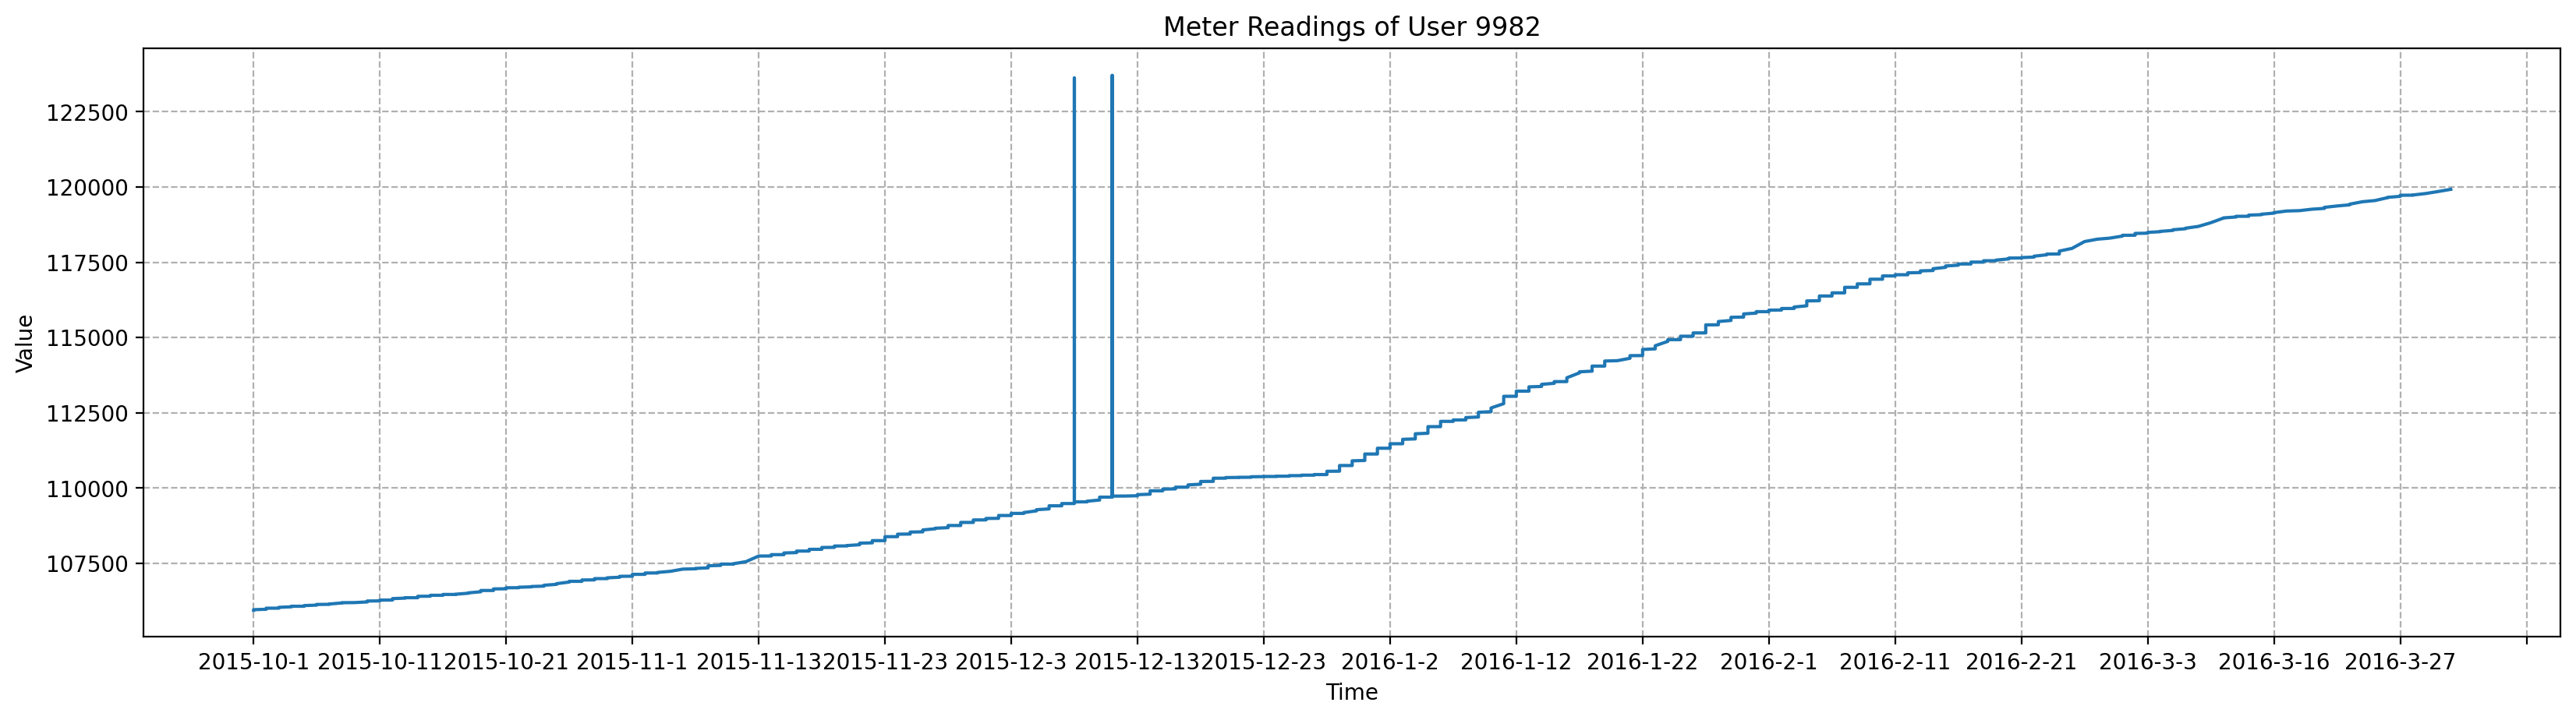

In [7]:
plot_meterval_ID(9982)

### 1.1.2 Find the malfunctioning meters and the malfunctioning periods

+ **Decreasing**, **long stagnation** and **long interval** in meter values are three types of malfunctioning.
 + **Decreasing:** As the meter values are cumulative, the readings should at least not decrease.
 + **Long stagnation:** It is normal that the meter readings do not change temporarily. However, stagnation lasted for more than a month can be suspicious.
 + **Long interval:** Normally, the meter collects data every 15 seconds. Singapore Power may modify this strategy. However, if a meter fails to collect data for a consecutive 30 days, it more likely to be malfunctioning.

**1) Detect decreasing**
 + Calculate the difference $\delta$ between each pair of meter values.
   + $\delta$ < 0: Decrease

In [8]:
def find_decrease(df):
    grouped = df.groupby(['dataid'])
    decrease_meter_id = []
    decrease_meter_times = []
    for key,group in grouped:
        value = group['meter_value']
        diff = value.diff()
        decrease_time_id = np.where(diff < 0)[0]
        last_time_id = np.where(diff < 0)[0]-1
        if len(decrease_time_id):
            decrease_meter_id.append(key)
            begin_time = group['localminute'].values[last_time_id]
            end_time = group['localminute'].values[decrease_time_id]
            decrease_meter_times.append(len(begin_time))
    deacrease_summary = {'dataid':decrease_meter_id,'malfunction times':decrease_meter_times}
    x = pd.DataFrame(deacrease_summary)
    sort_data = x.sort_values('malfunction times')
    return sort_data

In [31]:
decrease_data = find_decrease(df)
decrease_data.reset_index()

,index,dataid,malfunction times
0,0,35,1
1,36,7794,1
2,35,7739,1
3,32,7017,1
4,30,5892,1
5,29,5814,1
6,25,5131,1
7,23,4998,1
8,17,3527,1
9,12,1801,1


 + **Discussion: From the table above, there are 42 meters which have decrease meter values. Are they all malfunctioning?**

  + Showing the malfunction times of the decrease reading, we can find that some malfunctioning times are relatively small, and some of them are relatively large.
   + In our opinion, if a meter is really malfunctioning, the malfunction times should be greater than a threshold, and those below will be considered as sporadic. For the sporadic malfunction, it can be recording errors by the power company or a gas pipeline problem, rather than the meter itself. In the following example, we set this threshold to 6 (once a month).


+ Due to the large amount of data, we only display the summary information of the failed meter here. To show the details, uncomment the cell: *result = detail_decrease(df)*. The result is in another pdf file.

In [32]:
def detail_decrease(df):
    grouped = df.groupby(['dataid'])
    decrease_meter_id = []
    for key,group in grouped:
        value = group['meter_value']
        diff = value.diff()
        decrease_time_id = np.where(diff < 0)[0]
        last_time_id = np.where(diff < 0)[0]-1
        if len(decrease_time_id):
            decrease_meter_id.append(key)
            begin_time = group['localminute'].values[last_time_id]
            end_time = group['localminute'].values[decrease_time_id]
            detail = []
            for i in range (len(begin_time)):
                detail.append(str(begin_time[i])+'--'+str(end_time[i]))    
            print("The number of meterID which has decreased: "+str(key))
            print("Occur periods: "+" , ".join(detail)+"\n")
    return decrease_meter_id

In [33]:
# result = detail_decrease(df)

In [10]:
threshold_malfunction_times = 6
MeterIDs_MuchDiscrease = decrease_data[decrease_data['malfunction times']>threshold_malfunction_times]

malfunctioning_meters_Decreasing = MeterIDs_MuchDiscrease["dataid"].sort_values(ascending = True,inplace = False)
print('The number of malfunctioning meters by Decreasing in the mersurement is %d. \n' %len(malfunctioning_meters_Decreasing))
print('And all the malfunctioning meterIDs by Decreasing are:\n', malfunctioning_meters_Decreasing.values)

The number of malfunctioning meters by Decreasing in the mersurement is 17. 

And all the malfunctioning meterIDs by Decreasing are:
 [ 484 1185 1556 2449 3134 3544 4031 4514 5129 5403 5810 6836 7030 7117
 8156 8890 9134]


**2) Detect long stagnation**  
  + For all rows which $\delta$=0, group by the the readings and user ID in case different users have the same readings.
  + Compare the time span of each stagnation to 28 days. If the duration is larger than 28 days, print the start and end date of this time span.

+ **Group the data by meter value and dataid.**

In [11]:
sorted_df = df.sort_values(by=['dataid','localminute'])
value = sorted_df['meter_value']
zero_idx=(value.diff()==0)# rows which readings stays the same for two consecuative readings.
group_valueID=df[zero_idx].groupby(['meter_value','dataid'])
# list(group_valueID['localminute'])

+ **Get the counts to each corresponding (value,id) pair. For example, user 5317 has two readings of 28298.** 
 + The reason not to set a filter to sift those with at least n consecutive zeros is that two consecutive values may have long time gap too. However, it does cost a lot of time to execute.

In [12]:
counts=group_valueID.count()
counts

,,localminute,year,month
meter_value,dataid,,,
28298,5317,2,2,2
28304,5317,16,16,16
28306,5317,2,2,2
28322,5317,1,1,1
28324,5317,2,2,2
...,...,...,...,...
815804,5814,1,1,1
815806,5814,24,24,24
815808,5814,12,12,12


+ **Find the readings which remain constant for more than a month.**
 + Actually, two consecutive values can have long time gap too. The code below does not consider this situation for the sake of time. There will be another code considering this problem alone.

ID: 8967 , Start time: 2016-01-11 10:29:11+00:00 , End time: 2016-02-29 09:36:41+00:00 , No. readings: 1584 , Time Gap:  48 days 23:07:30


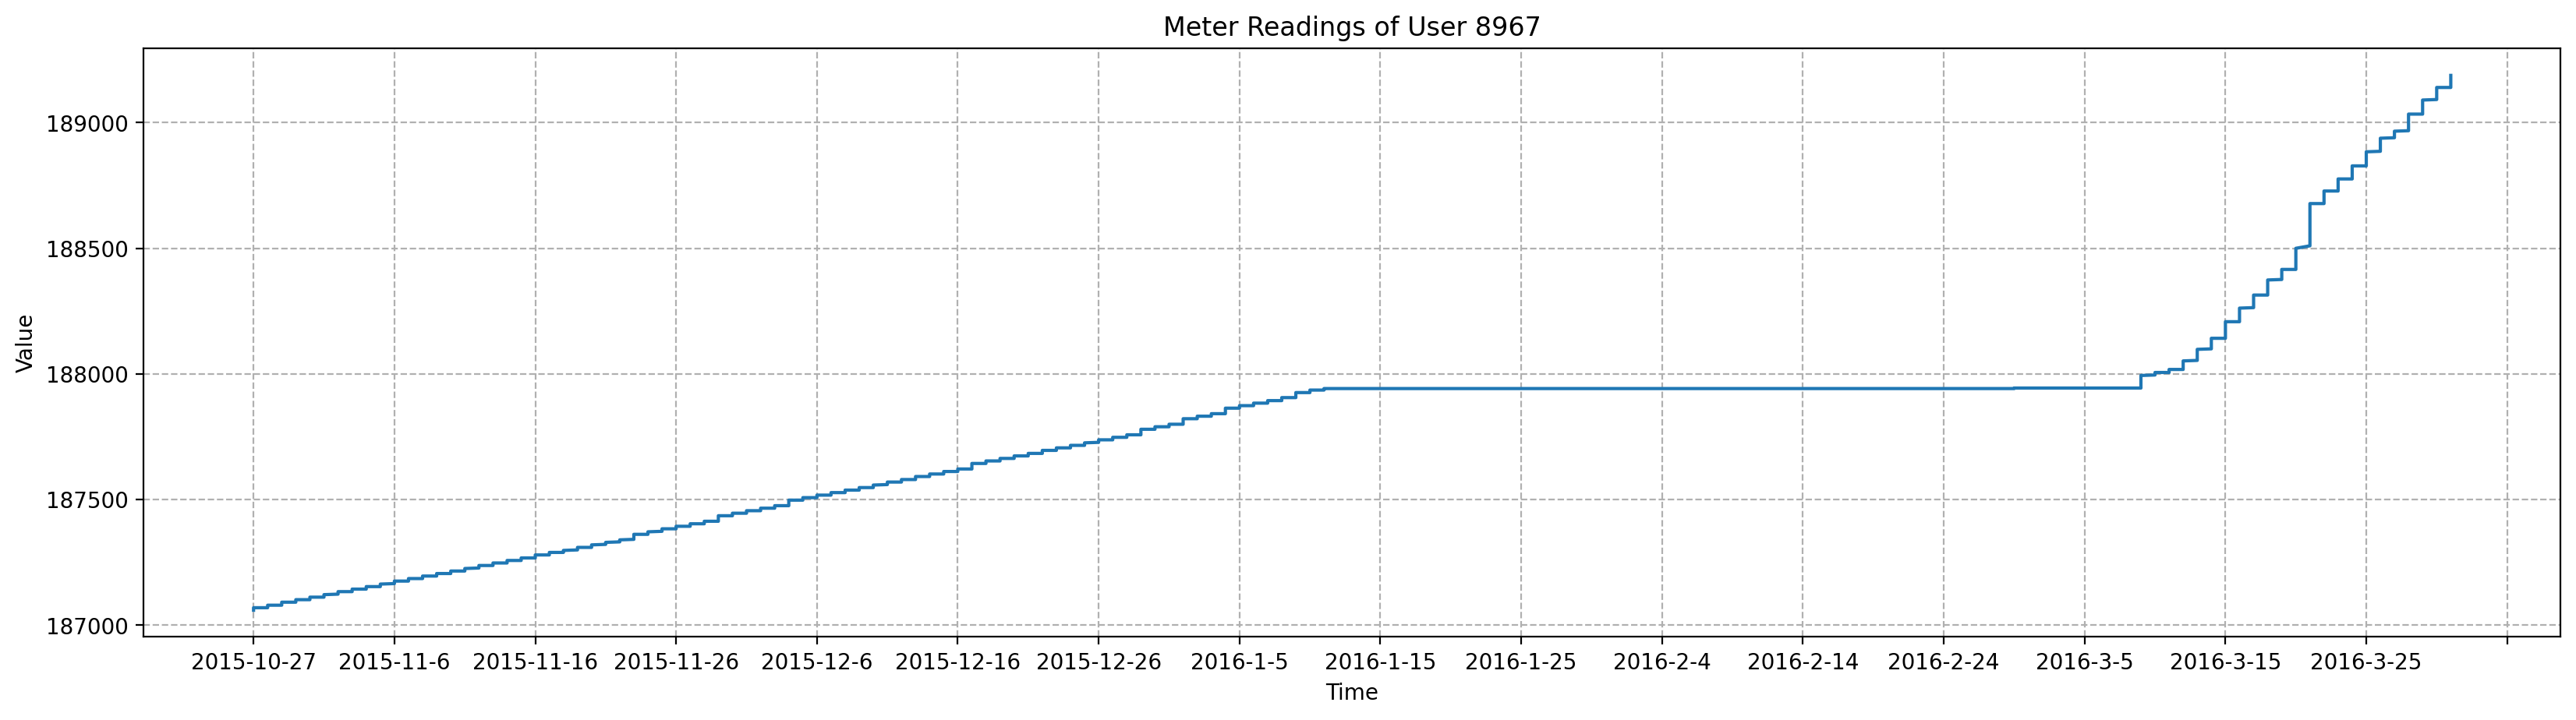

In [27]:
for idx,valueID in enumerate(counts.index.tolist()):
    time=group_valueID['localminute'].get_group(valueID)
    num=counts.iloc[idx]['localminute']
    time_gap=time.iloc[num-1]-time.iloc[0]
    if time_gap>timedelta(days=30):
        print('ID:',valueID[1],', Start time:',time.iloc[0],', End time:',time.iloc[num-1],', No. readings:',num,', Time Gap: ',time_gap)
        plot_meterval_ID(valueID[1])

+ Only user 8967 has long stagnation.

**3) Detect long interval**  
  + If the reading of a user is suspended for a long time, we define it as long interval and it may need to be repaired by relevant departments or investigate if the household hasn't been using gas lately. In the following example, we set the time threshold to 30 days.

In [28]:
Threshold_interval = 30

def find_long_interval(df, Threshold_interval):
    Grouped = df.groupby('dataid')
    Long_interval_meter_id = []
    periods = []
    for key,group in Grouped:
        internal = group['localminute'].diff()
        endtime_idx = np.where(internal > pd.Timedelta(days=Threshold_interval))[0]
        begintime_idx = np.where(internal > pd.Timedelta(days=Threshold_interval))[0]-1
        if len(begintime_idx):
            begin_time = group['localminute'].values[begintime_idx]
            end_time = group['localminute'].values[endtime_idx]
            detail = []
            for i in range (len(begin_time)):
                detail.append(str(begin_time[i])+' -- '+str(end_time[i]))    
            Long_interval_meter_id.append(key)
            periods.append(",".join(detail))
            print("The number of meterID which has long interval: "+str(key))
            print("Occurring periods: "+" , ".join(detail)+"\n")
    Long_intervnal_summary = {'dataid':Long_interval_meter_id,'malfunction periods':periods}
    x = pd.DataFrame(Long_intervnal_summary)
    return x

In [29]:
x = find_long_interval(df, Threshold_interval)
x

The number of meterID which has long interval: 2233
Occurring periods: 2016-01-03T09:32:01.000000000 -- 2016-02-04T14:31:23.000000000

The number of meterID which has long interval: 2638
Occurring periods: 2015-12-21T00:30:35.000000000 -- 2016-02-04T13:11:12.000000000

The number of meterID which has long interval: 2645
Occurring periods: 2015-11-14T19:04:27.000000000 -- 2015-12-21T13:54:44.000000000

The number of meterID which has long interval: 3039
Occurring periods: 2016-01-02T20:17:02.000000000 -- 2016-02-04T13:07:41.000000000

The number of meterID which has long interval: 4352
Occurring periods: 2015-12-21T00:29:14.000000000 -- 2016-02-04T13:18:31.000000000

The number of meterID which has long interval: 4421
Occurring periods: 2015-12-20T22:54:23.000000000 -- 2016-02-04T13:43:18.000000000

The number of meterID which has long interval: 4447
Occurring periods: 2015-12-21T00:19:10.000000000 -- 2016-02-04T13:05:49.000000000

The number of meterID which has long interval: 4671
Occ

,dataid,malfunction periods
0,2233,2016-01-03T09:32:01.000000000 -- 2016-02-04T14...
1,2638,2015-12-21T00:30:35.000000000 -- 2016-02-04T13...
2,2645,2015-11-14T19:04:27.000000000 -- 2015-12-21T13...
3,3039,2016-01-02T20:17:02.000000000 -- 2016-02-04T13...
4,4352,2015-12-21T00:29:14.000000000 -- 2016-02-04T13...
5,4421,2015-12-20T22:54:23.000000000 -- 2016-02-04T13...
6,4447,2015-12-21T00:19:10.000000000 -- 2016-02-04T13...
7,4671,2015-11-23T09:48:24.000000000 -- 2016-01-05T09...
8,4874,2016-02-04T19:10:36.000000000 -- 2016-03-08T10...
9,6685,2015-10-20T09:16:24.000000000 -- 2015-12-10T21...


+ The number of malfunctioning meters by long interval in the measurement is 17. 
+ And all the malfunctioning meterIDs by long stagnation are : [2233, 2638, 2645, 3039, 4352, 4421, 4447, 4671, 4874, 6685, 6863,7460, 7919, 8467, 8703, 9474, 9620]

 **Combining the above three analyses, we think the meterids below are malfunctioning.**  
  + **[ 484 1185 1556 2449 3134 3544 4031 4514 5129 5403 5810 6836 7030 7117 8156 8890 9134] and [8967] have problems in meter values.**
  + **[ 2233, 2638, 2645, 3039, 4352, 4421, 4447, 4671, 4874, 6685, 6863,7460, 7919, 8467, 8703, 9474, 9620] need to be investigated why they don't have meter value.**

---

## <font color=##008B8B > Question 1.2 </font>

**<font color=##008B8B >Generate hourly readings from the raw data. Select one month from the 6-month study interval and plot the hourly readings (time-series) for that month. Hint: You will have to decide what to do if there are no readings for a certain hour.</font>**

In [16]:
#Select the first record of each hour as the reading of the hour;if an hour do not have record, select the reading of the previous hour
x = df.groupby(['dataid'])
def polt_hourlyReadingOfMonth(tar_dataid, tar_year, tar_month):
    y = x.get_group(tar_dataid)
    MeterReadings = y.groupby(['year','month'])
    HouseReading = MeterReadings.get_group((tar_year,tar_month))  
    start_time = pd.Timestamp(year=tar_year, month=tar_month, day=1)
    #month and corresponding days
    month_day_map  = {1:31, 2:29, 3:31, 10:31, 11:30, 12:31}
    days = month_day_map[tar_month]
    hourly_reading = np.zeros(24*days)
    for d in range(days):
        d_rows = HouseReading[HouseReading['localminute'].dt.day == d+1].reset_index()
        for i in range(24):
            rows = d_rows[d_rows['localminute'].dt.hour == i].reset_index()
            if len(rows) > 0:
                row = rows.iloc[0]
                hourly_reading[d*24+i] = row['meter_value']
            else:
                if d+i>0:
                    hourly_reading[d*24+i] = hourly_reading[d*24+i-1]
    # print(hourly_reading)
    x_idx = [i for i in range(24*days)]
    date_idx = [i+1 for i in range(days)]
    plt.rcParams['figure.figsize'] = (15.0, 5.0)
    plt.plot(x_idx, hourly_reading)
    plt.title("Gas reading of dataid: "+str(HouseReading.iloc[0]['dataid'])+", Collection time: "+str(tar_year)+"-"+str(tar_month))
    plt.xticks(x_idx[::24], date_idx[::1])
    plt.grid(ls='--')
    plt.show()

+ **As an example and in order to reduce the duplicate content, here we only show three users' result in 2015 October.**

For example, here we show three houses meter reading on 2015-10 , meterIDs are 35,44 and 77


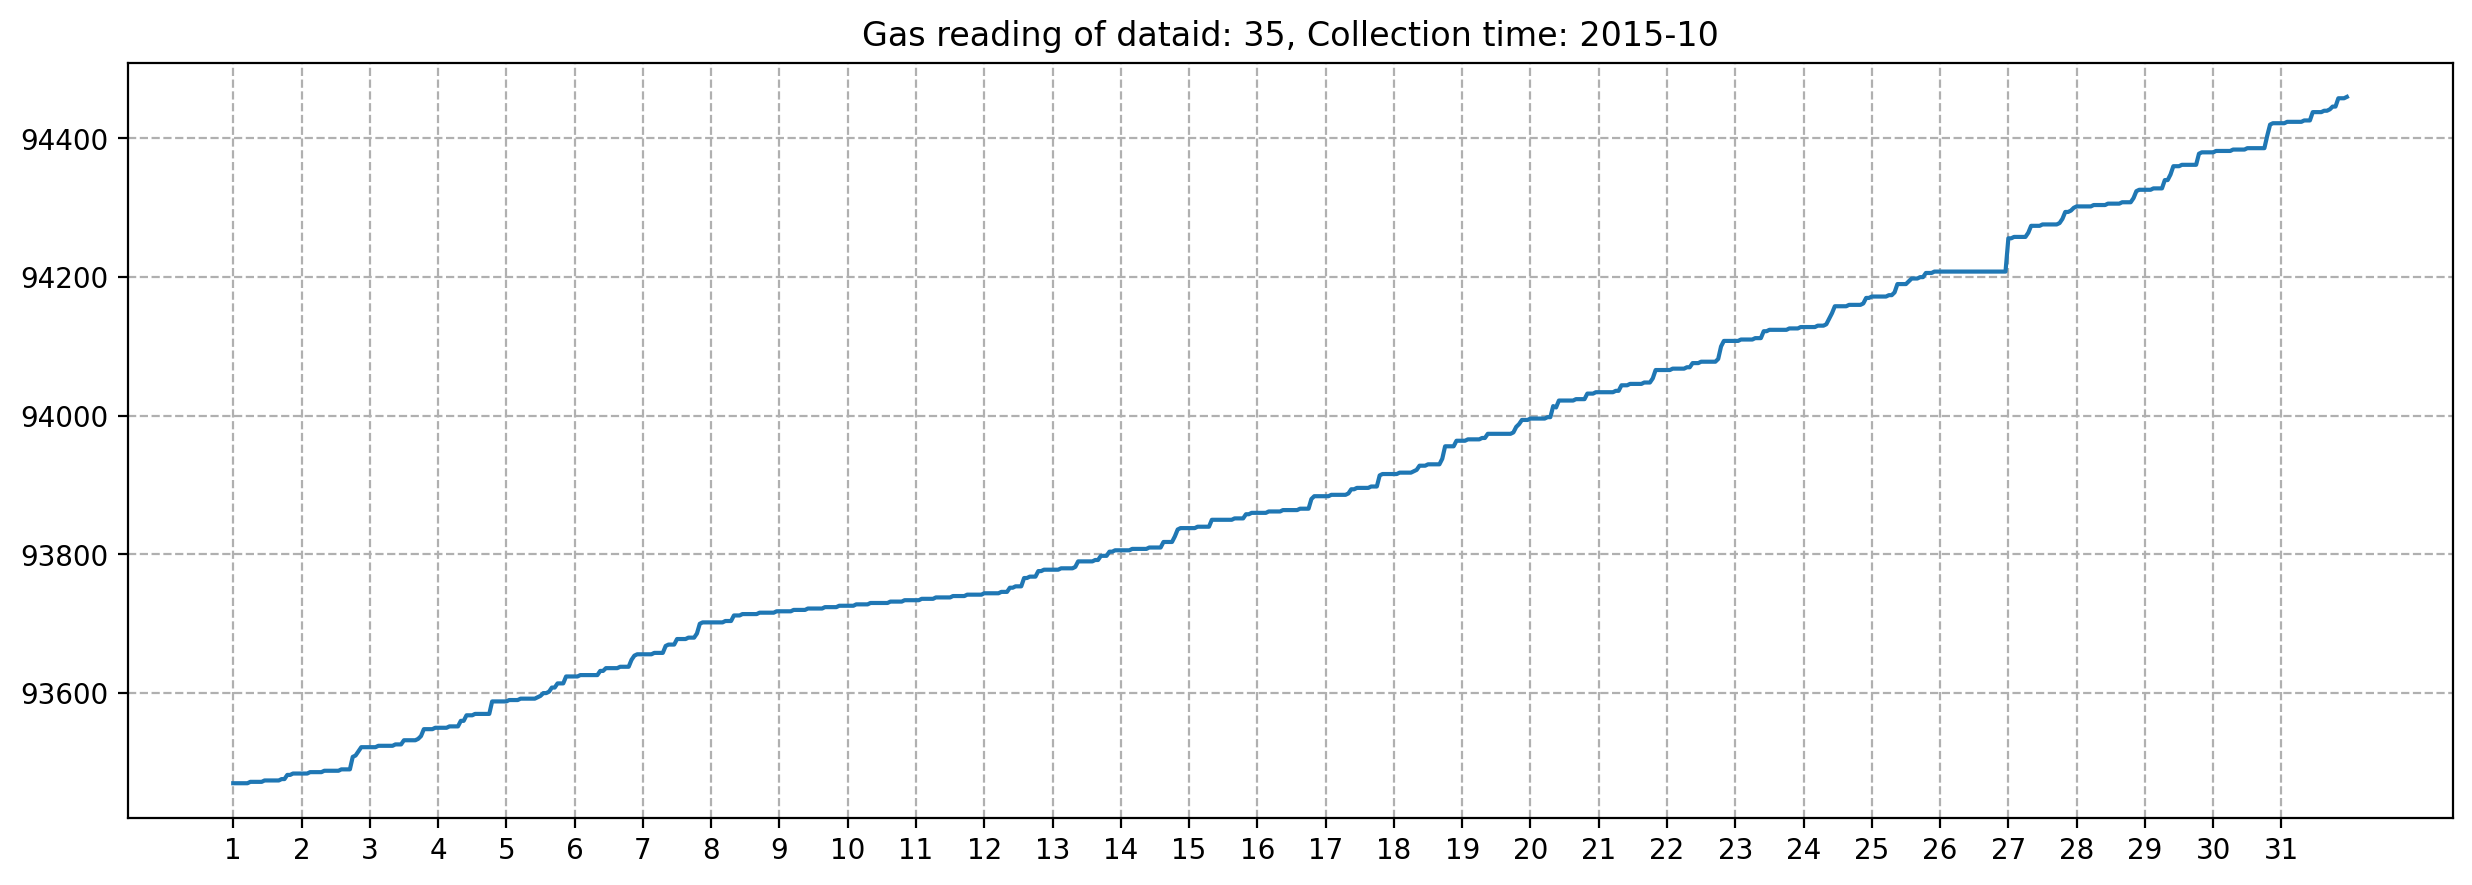

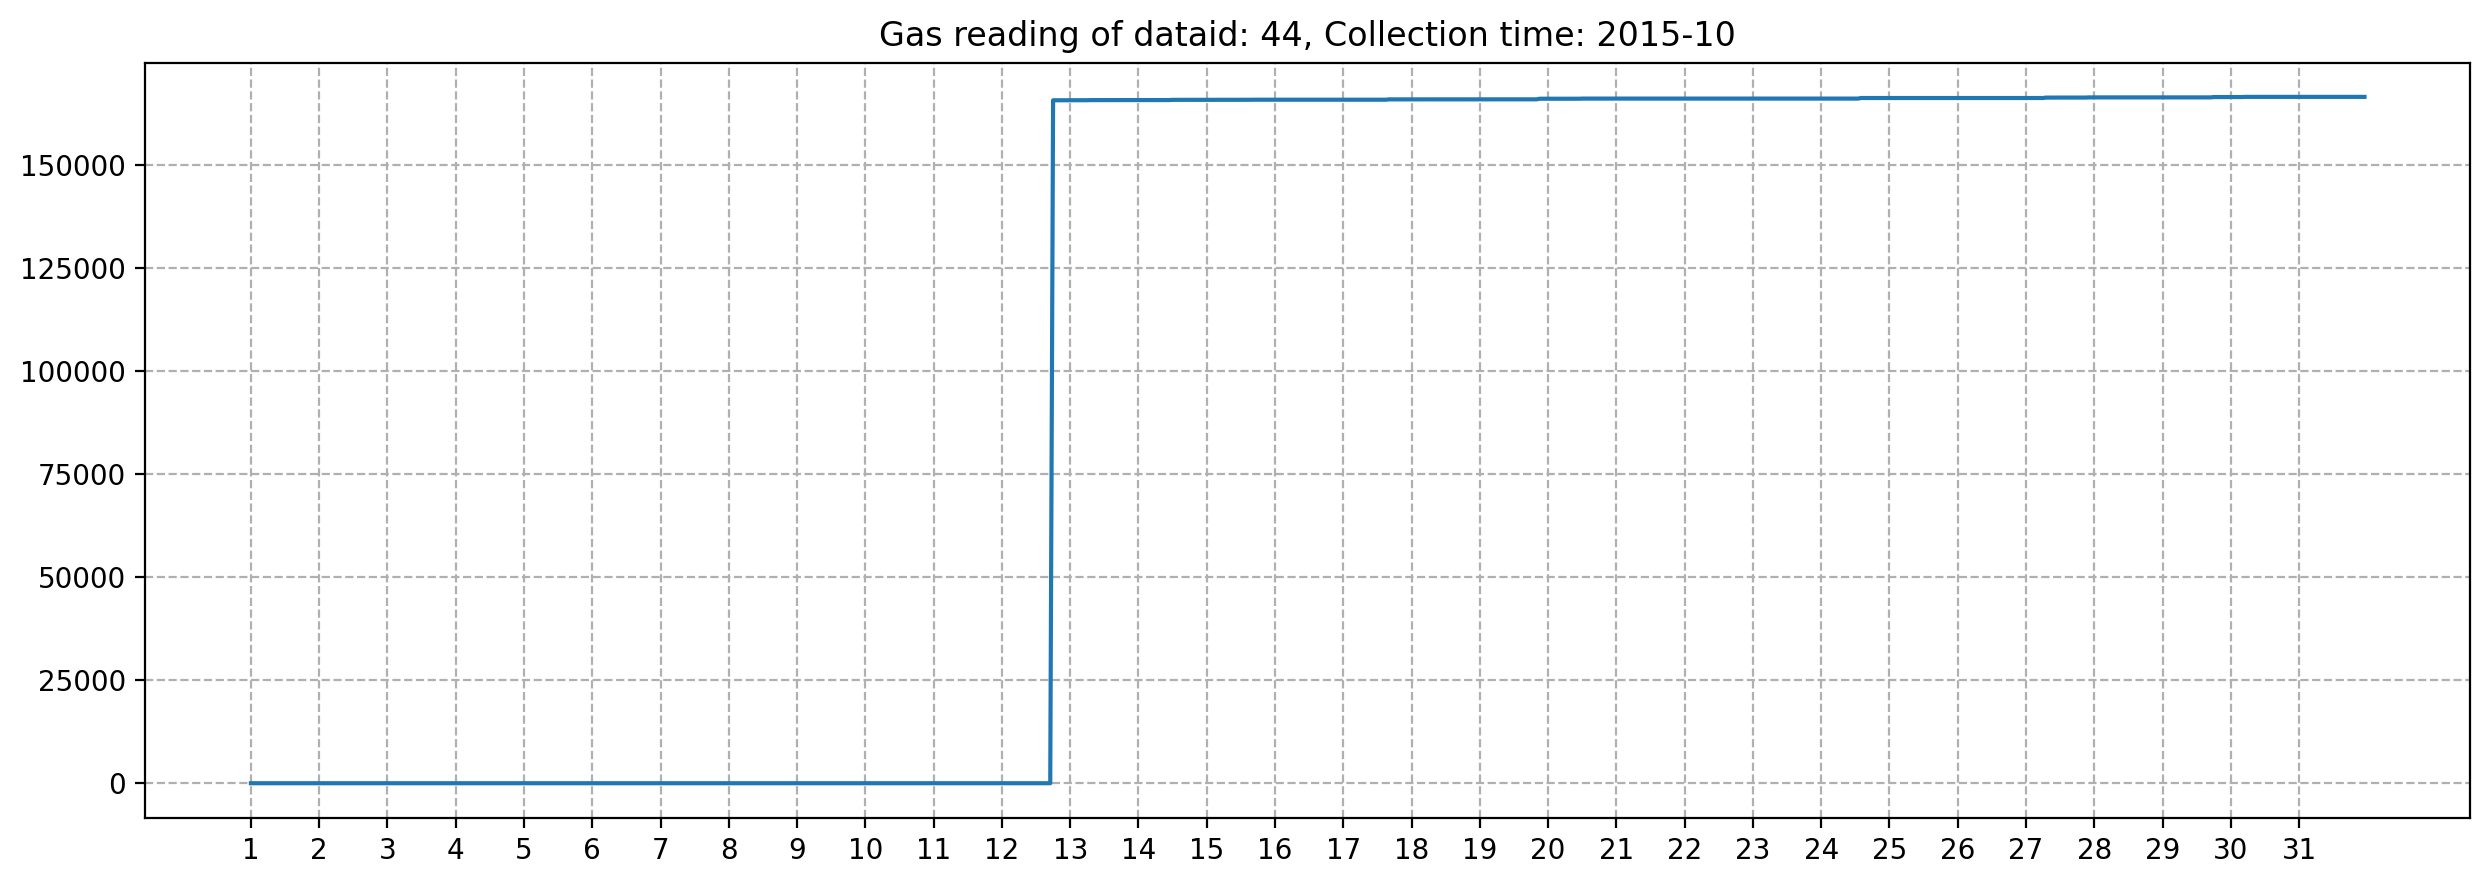

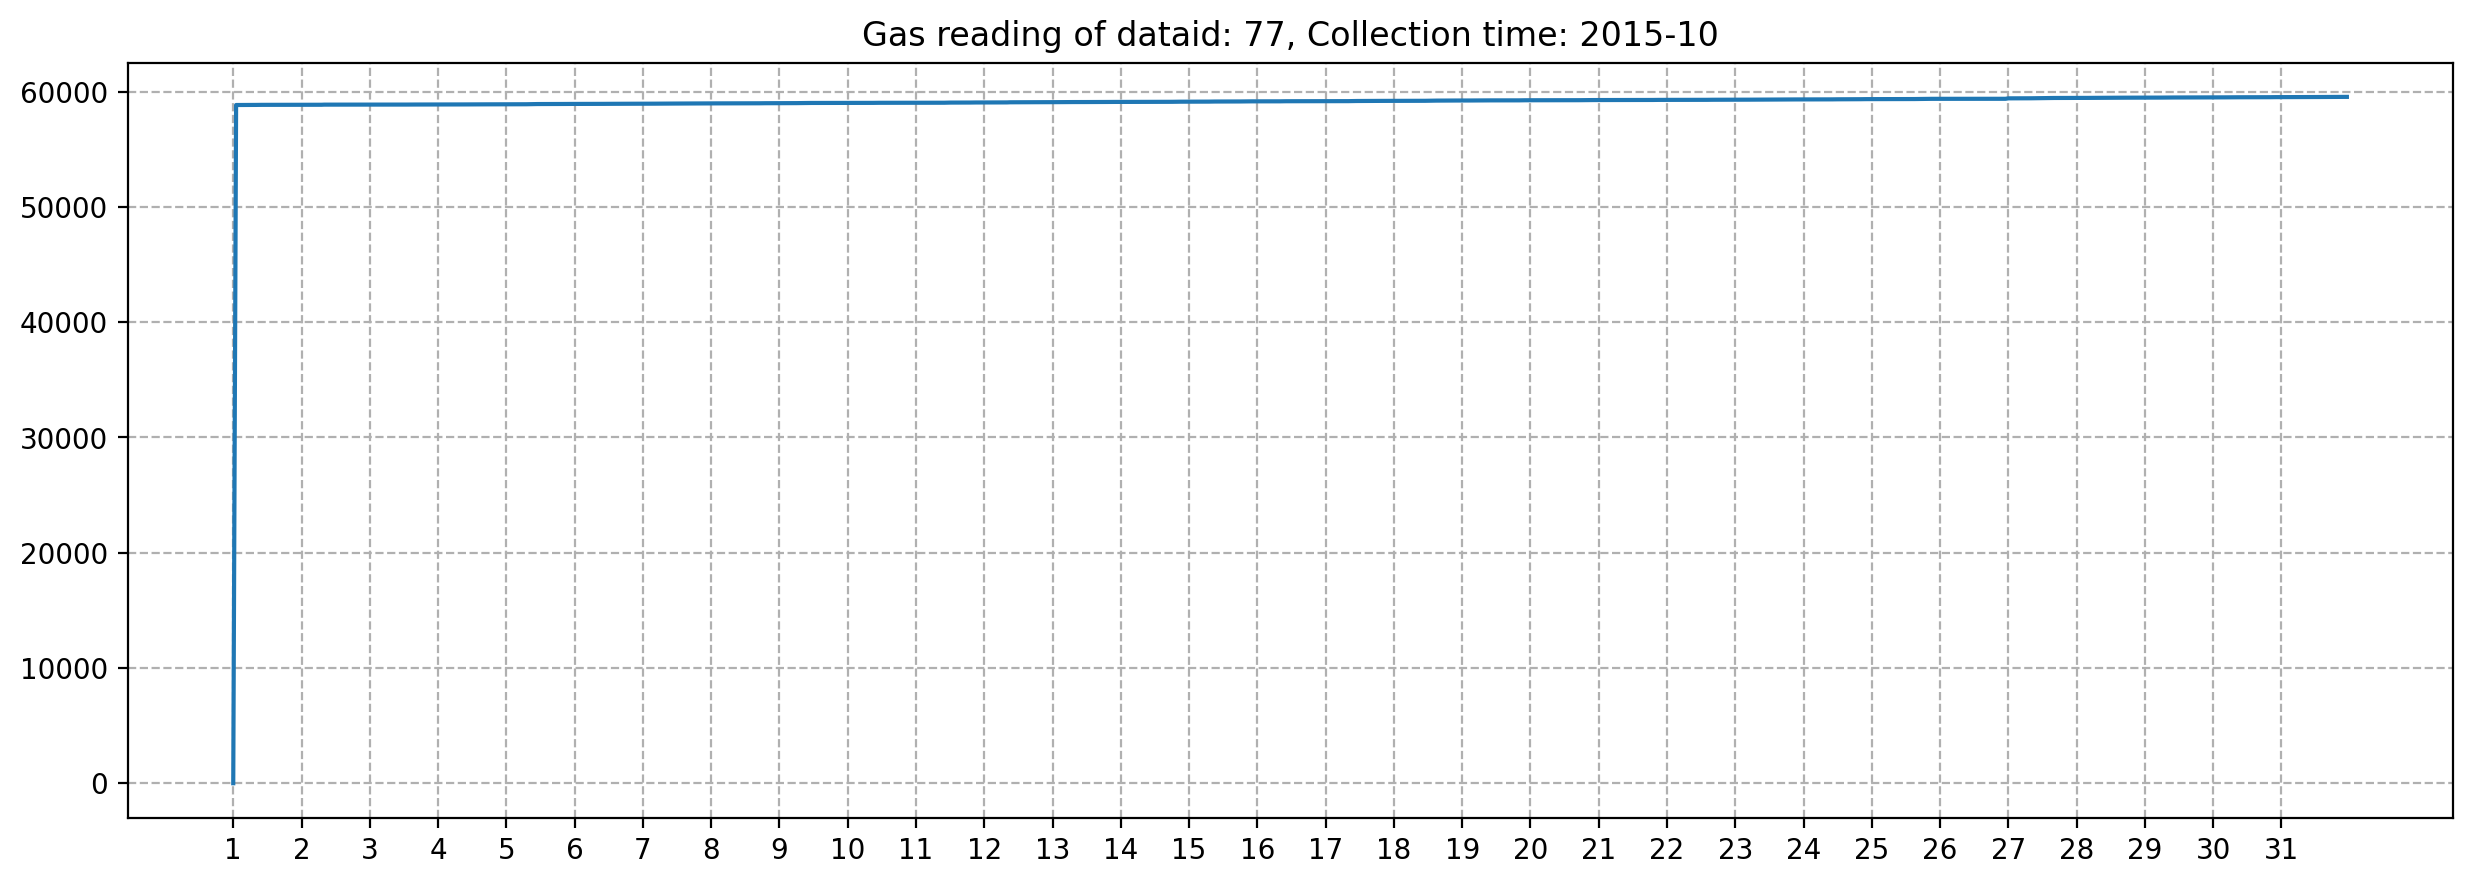

In [17]:
# You can see the hourly reading of month here.Input the 'dataid'，'year', 'month'
print('For example, here we show three houses meter reading on 2015-10 , meterIDs are 35,44 and 77')
polt_hourlyReadingOfMonth(35, 2015, 10)
polt_hourlyReadingOfMonth(44, 2015, 10)
polt_hourlyReadingOfMonth(77, 2015, 10)

---

## <font color=##008B8B > Question 1.3 </font>

**<font color=##008B8B >Intuitively, we expect that gas consumption from different homes to be correlated.For example, many homes would experience higher consumption levels in the evening when meals are cooked. For each home, find the top five homes with which it shows the highest correlation.</font>**

+ **Generating a dictionary and store the corresponding data for each ID:**

In [18]:
Grouped123 = df.groupby('dataid')
dataids_key = [ key for key,reading in Grouped123]

 + **Next, we are going to compute the daily average consumption for total 6 months**

In [19]:
dict_use_for_users_YEARtotal = {}
Date = list()

month_day_map  = {1:31, 2:29, 3:31, 10:31, 11:30, 12:31}
k = 0
Y = df.groupby('month')
for m in [10,11,12,1,2,3]:
    X = Y.get_group(m)
    days = month_day_map[m]
    for d in range(days):
        k = k+1
        dict_use_for_users = dict()
        d_rows = X[X['localminute'].dt.day == d+1]
        Grouped = d_rows.groupby('dataid')
        keys = [ key for key,group in Grouped ]
        for key in dataids_key:
            if key not in keys:
                value = [0 for i in range(24)]
                dict_use_for_users.update({key:value})
                continue
            house_reading = Grouped.get_group(key)
            value = [0 for i in range(24)]
            for h in range(24):
                rows = house_reading[house_reading['localminute'].dt.hour == h]
                if len(rows) > 1:
                    max_value = rows['meter_value'].max()
                    min_value = rows['meter_value'].min()
                    value[h] = max_value - min_value
                else:
                    continue
            dict_use_for_users.update({key:value})
        dict_use_for_users_YEARtotal[k] = dict_use_for_users

+ **To reduce the errors, we decide to start from the first day of using gas for each ID:**

In [20]:
start = dict()
for key in dataids_key:
    for k in range(183):
        if sum(dict_use_for_users_YEARtotal[k+1][key]) > 0:
            break
    begin = k+1
    start.update({key:begin}) # start from the first day of using gas

+ **Then we can plot the daily average consumption in 6 months for every ID. We will try ID 8890 for example:**

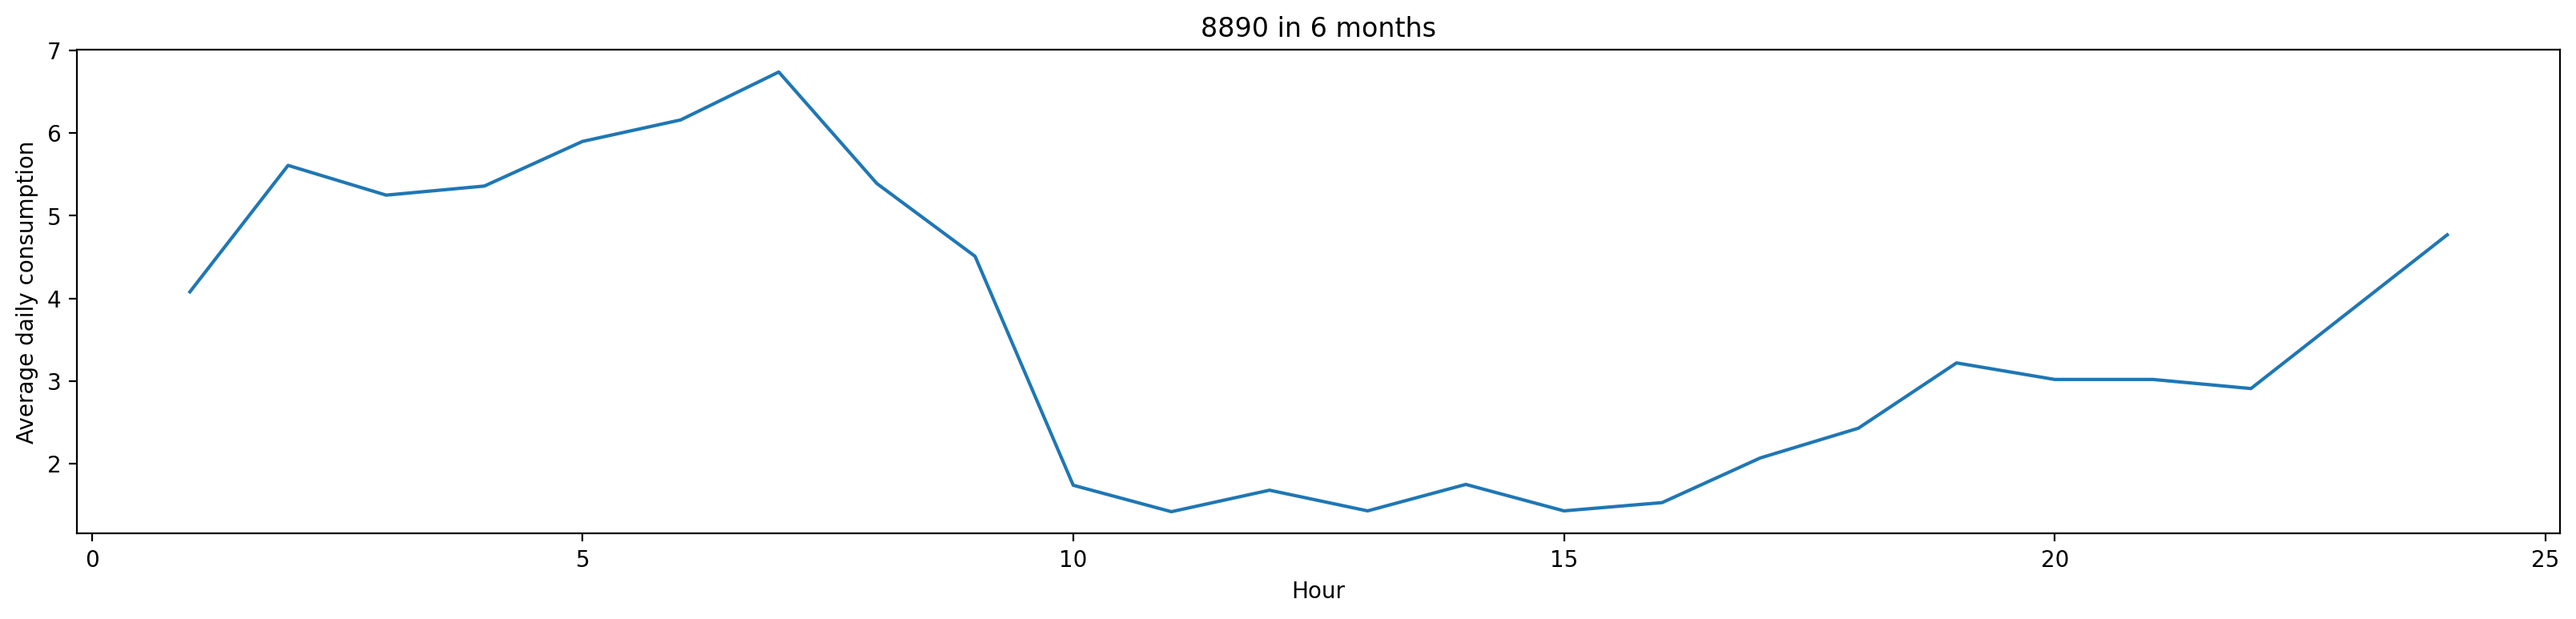

In [21]:
dict_use_for_users_YEARaverage = dict()
for key in dataids_key:
    mean = np.zeros(24)
    for k in range(start[key],183):
        mean += np.array(dict_use_for_users_YEARtotal[k+1][key])    
    mean = mean/(184 - start[key]) # Calculating the mean consumption for a day in 6 months
    mean = [round(i,2) for i in mean]
    dict_use_for_users_YEARaverage.update({key:mean})

plt.rcParams['figure.figsize'] = (20.0, 4.0)
x = dict_use_for_users_YEARaverage[8890]
y = [i+1 for i in range(24)]
plt.plot(y,x)
plt.xlabel('Hour')
plt.ylabel('Average daily consumption')
plt.title('8890 in 6 months') 
plt.show()

+ **To find the top 5 correlated IDs, we can use Euclidean distance between each ID and find the top 5 nearest IDs. After that we can plot the graph of top five homes with which it shows the highest correlation for each ID:**

In [22]:
ID = dataids_key
distance = np.zeros((len(ID), len(ID)))
for i in range(len(ID)):
    for j in range(len(ID)):
        # Calculating the Euclidean distance for each ID
        distance[i][j] = np.linalg.norm(list(map(lambda x: x[0]-x[1], zip(dict_use_for_users_YEARaverage[ID[i]], dict_use_for_users_YEARaverage[ID[j]]))))
def topfive(k):
    loc = ID.index(k)
    x_idx = [i for i in range(24)]
    nearests = np.argpartition(distance[loc], 6)[:6]
    plt.rcParams['figure.figsize'] = (20.0, 4.0)
    a = []
    for idx in nearests:
        plt.plot(x_idx, dict_use_for_users_YEARaverage[ID[idx]], label=str(ID[idx]))
        a.append(ID[idx])
    plt.xlabel('Hour')
    plt.ylabel('Average daily consumption')
    plt.legend()
    plt.show()
    a.remove(ID[loc])
    print('Top five homes with which it shows the highest correlation most correlated IDs for ID {} is: {}, {}, {}, {} and {}'.format(ID[loc], a[0], a[1], a[2], a[3], a[4]))

+ **Since plot the graph for every ID will cost a large number of time, as an example and in order to reduce the duplicate content, here we only we randomly select 3 IDs and plot their graphs.**

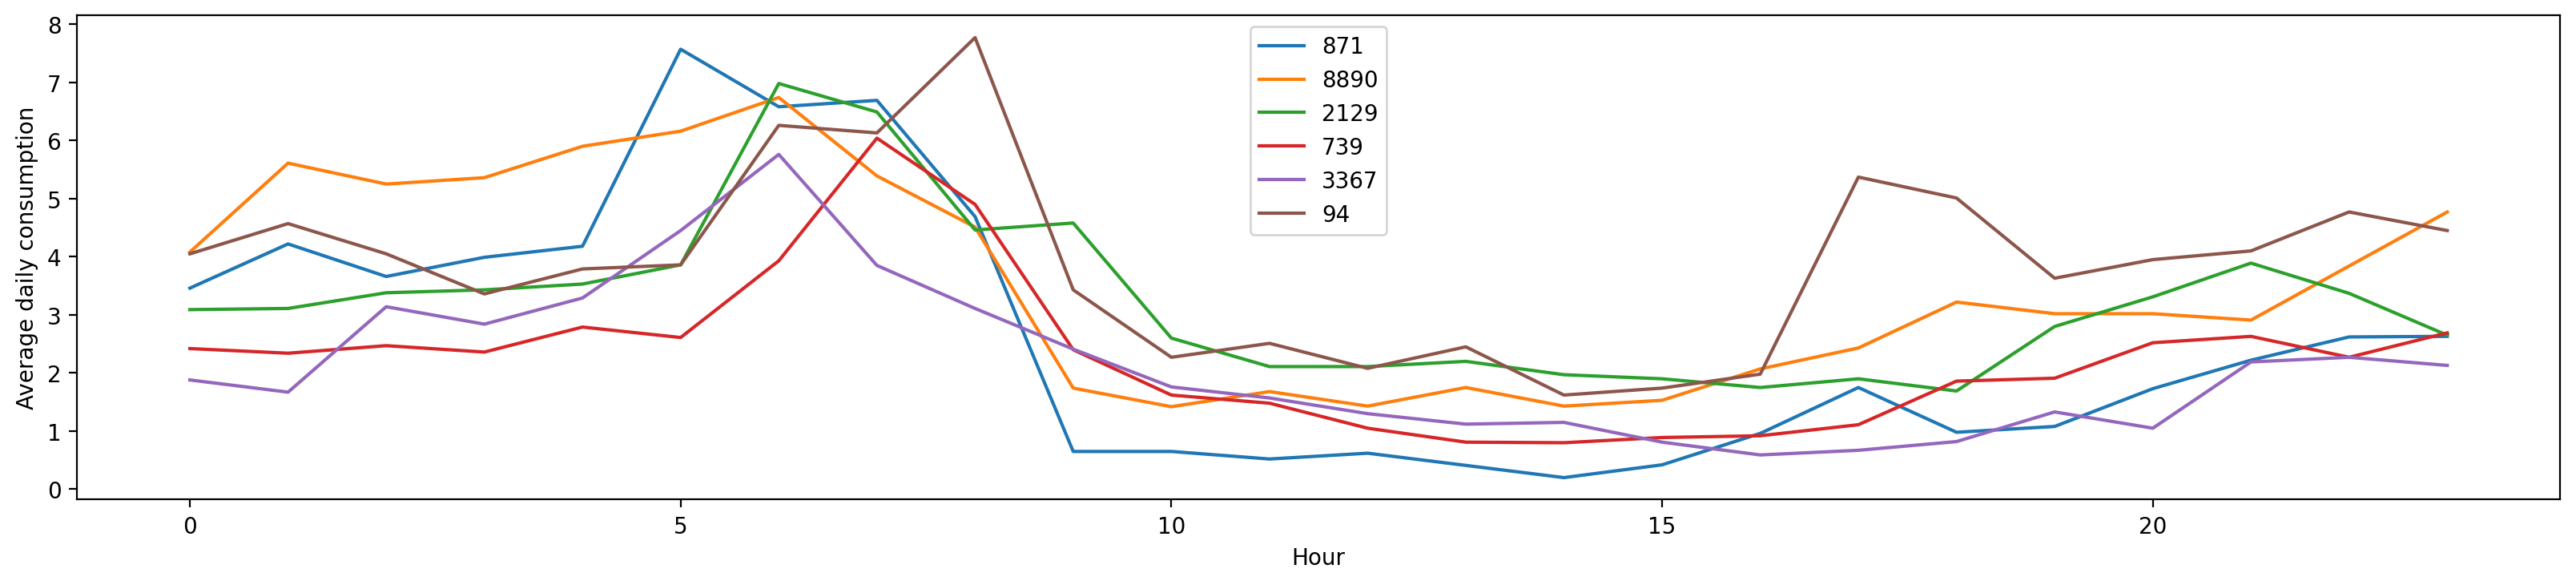

Top five homes with which it shows the highest correlation most correlated IDs for ID 8890 is: 871, 2129, 739, 3367 and 94


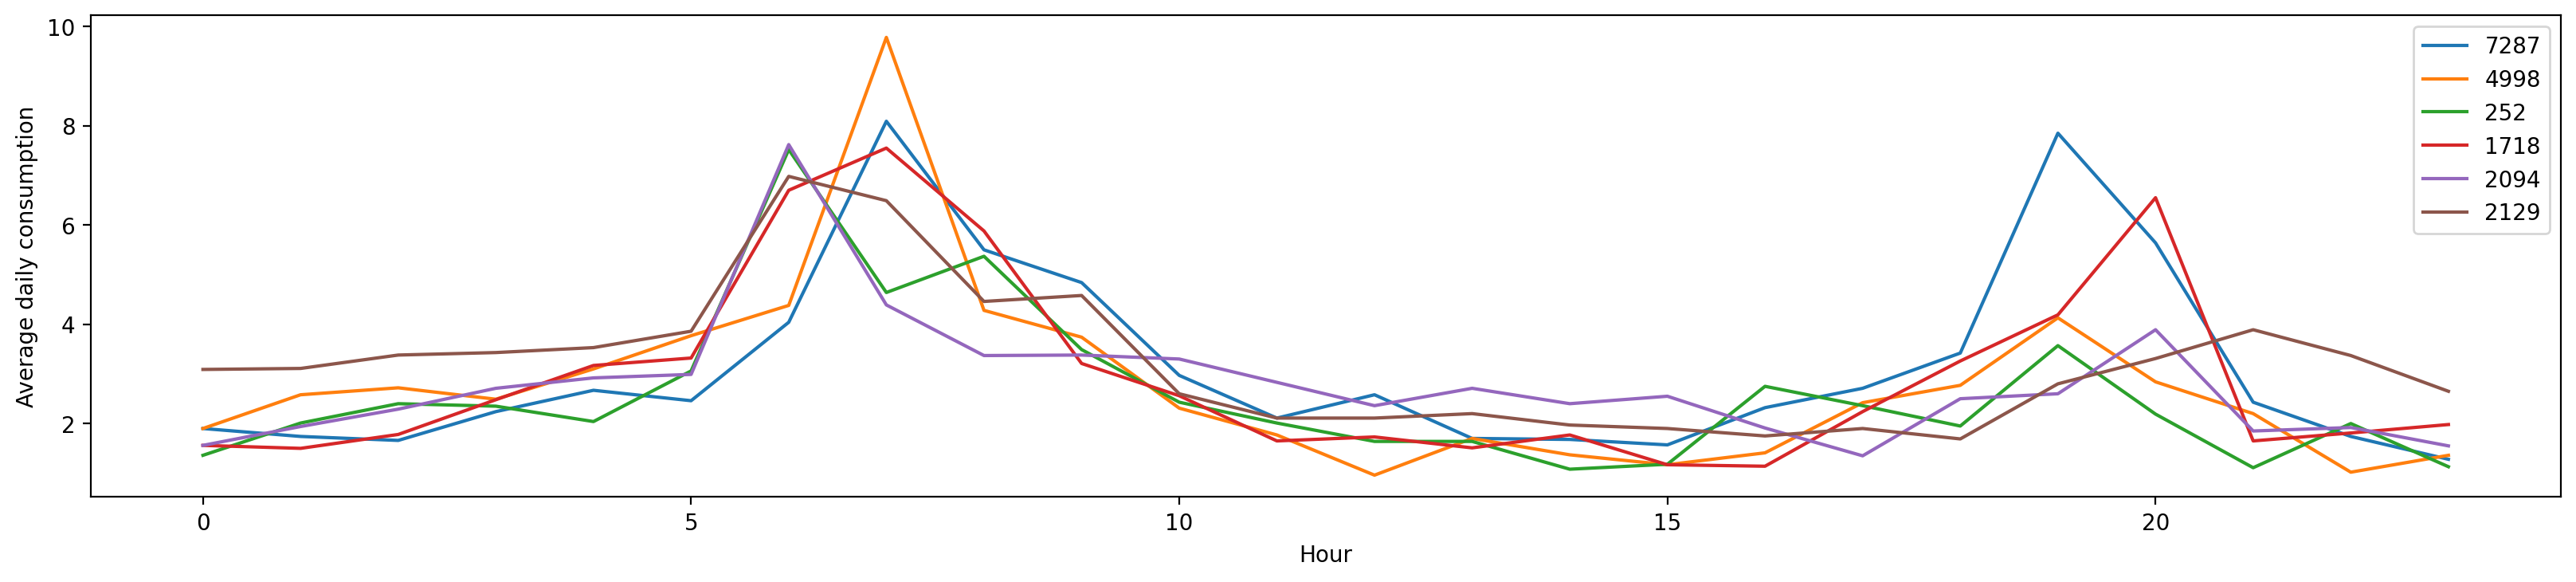

Top five homes with which it shows the highest correlation most correlated IDs for ID 1718 is: 7287, 4998, 252, 2094 and 2129


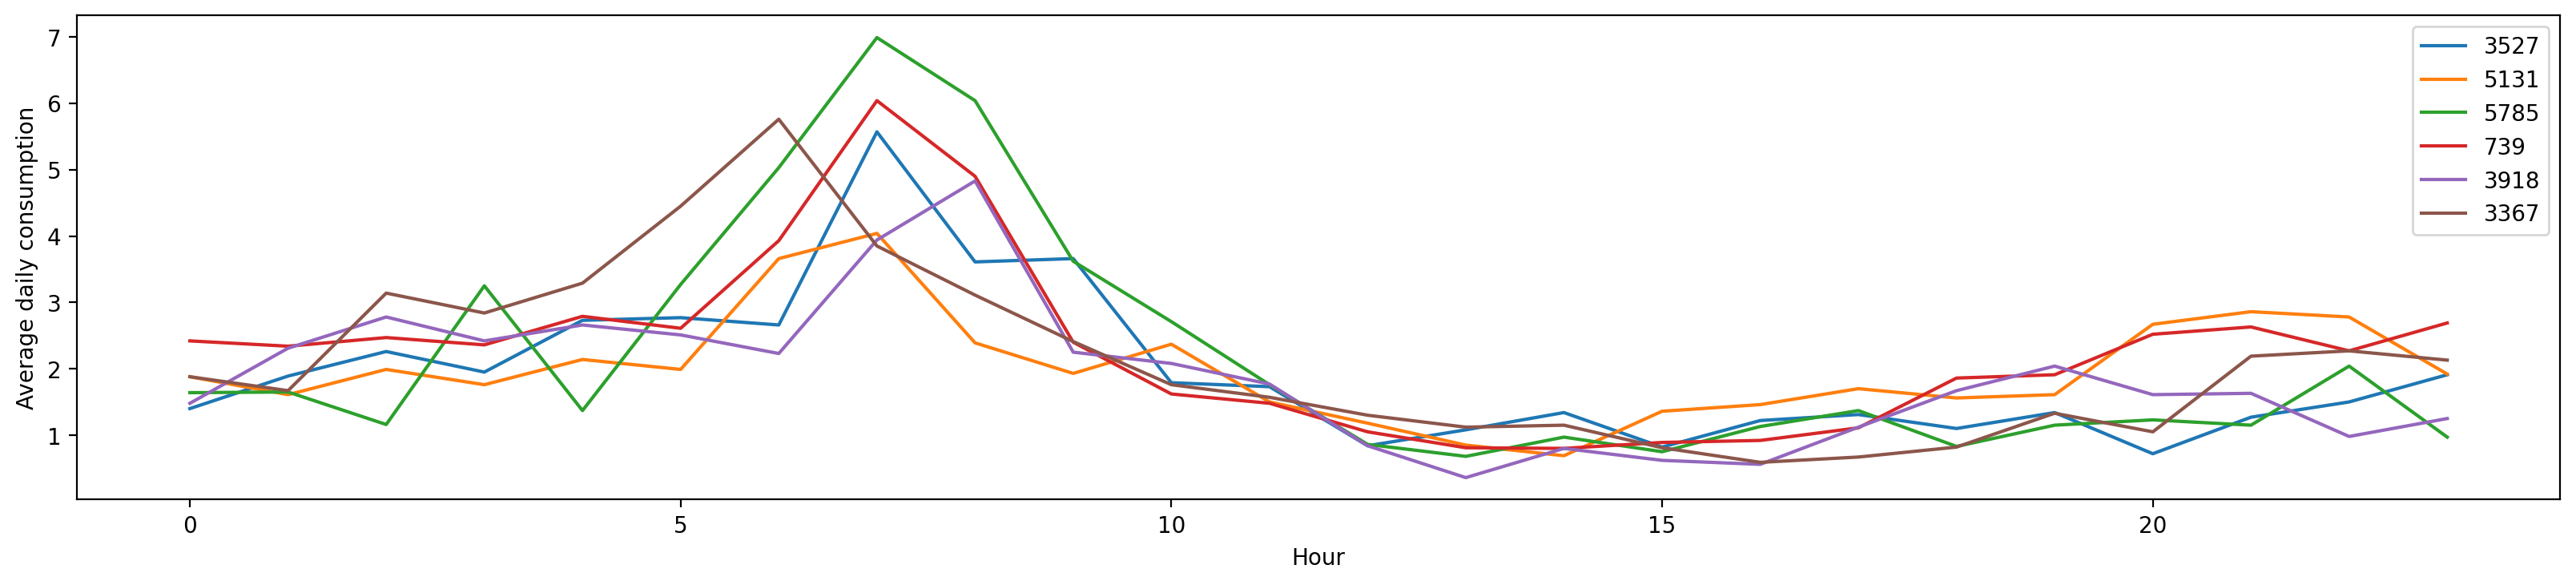

Top five homes with which it shows the highest correlation most correlated IDs for ID 739 is: 3527, 5131, 5785, 3918 and 3367


In [23]:
topfive(8890) 
topfive(1718)
topfive(739)